# Analiza držav
V tej projektni nalogi bom analizirala vse države na svetu. Podatke sem zajela na internetni strani https://www.geograf.in/en/table.php?col1=state&col2=continent&col3=area&col4=population&col5=gdp&col6=life&col7=government&col8=density&col9=religion&filter=0&order_by=state&ascdesc=ASC


In [174]:
import pandas as pd
pd.set_option('display.max_rows', 20)
%matplotlib inline
drzave = pd.read_csv('države_podatki/drzave.csv', index_col='ime')

In [175]:
drzave

,kontinent,območje (km2),populacija,gdp (USD per capita),življenska doba (leta),vlada,gostota (ljudi na km2),vera
ime,,,,,,,,
Afghanistan,Asia,647500,31575018,1976,64.0,presidential republic,49,Sunni Islam
Albania,Europe,28748,2821977,12943,78.5,republic with parliamentary system,98,Sunni Islam
Algeria,Africa,2381740,42545964,15292,76.3,semi-presidential republic,18,Sunni Islam
Andorra,Europe,468,76246,0,81.7,constitutional monarchy based on parlamentarism,163,Catholic Christianity
Angola,Africa,1246700,29250009,6657,61.8,presidential republic,23,Catholic Christianity and Natural religion
...,...,...,...,...,...,...,...,...
Vietnam,Asia,331212,94660000,6790,76.5,republic with single political movement,286,Mahayana Buddhism
Western Sahara,Africa,266000,567402,0,0.0,other,2,Sunni Islam
Yemen,Asia,527970,28915284,2606,65.2,other,55,Sunni and Shi'ite Islam


Najprej poglejmo koliko držav je na vsake kontinentu.

In [176]:
drzave.groupby("kontinent").size()

kontinent
Africa     55
America    35
Asia       46
Europe     46
Oceania    14
dtype: int64

Vemo da ima Azija največ prebivalcev, saj se v njej nahajata kar dve največji državi po populaciji. Kateri kontinent pa je najgotseje poseljen?<br>Evropa je najgosteje poseljen kontinent, kar je tudi pričakovano, saj je po velikosti veliko manjša od Azije in Amerike.

<Axes: xlabel='kontinent'>

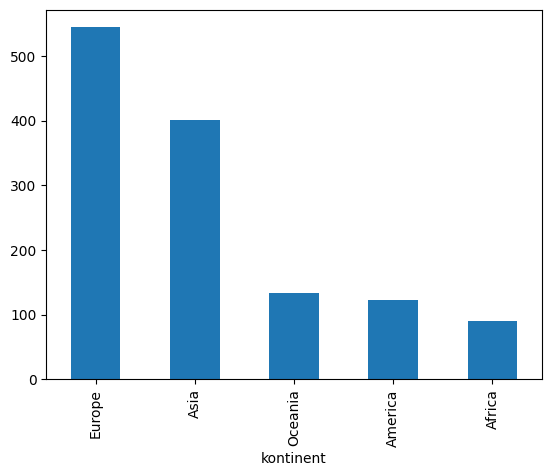

In [177]:
gostota_na_kontinentu = drzave.groupby(by="kontinent")["gostota (ljudi na km2)"].mean()
gostota_na_kontinentu.sort_values(inplace = True, ascending = False)
gostota_na_kontinentu.plot.bar()

GDP je pomemben ekonomski kazalnik, ki predstavlja skupno denarno vrednost vseh dobrin in storitev, proizvedenih znotraj meja neke države v določenem obdobju. GDP se uporablja za merjenje velikosti in zdravja gospodarstva ter nanj vplivajo dejavniki, kot so potrošnja, naložbe, vladna poraba in neto izvoz.<br>Zanima nas kateri kontinent ima v povprečju največji GDP glede na število prebivalcev.<br>Na prvem mestu je Evropa, na zadnjem pa Afrika, kar ni presenetljivo saj se v Afriki nahaja veliko slabše razvitih držav.

<Axes: xlabel='kontinent'>

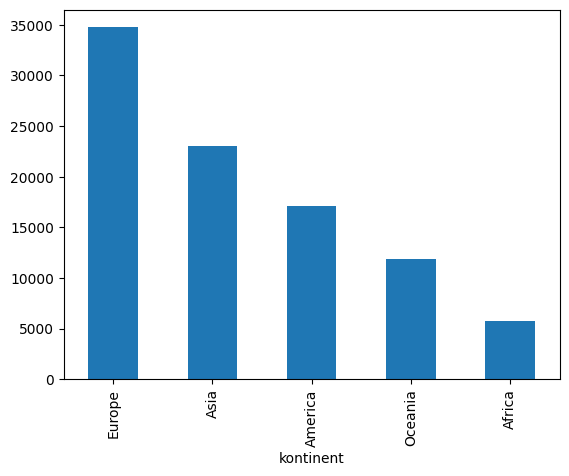

In [178]:
gdp_na_kontinentu = drzave.groupby(by="kontinent")["gdp (USD per capita)"].mean()
gdp_na_kontinentu.sort_values(inplace = True, ascending = False)
gdp_na_kontinentu.plot.bar()

Ker smo v pri prejšnjem grafu uporabili podatek GDP per capita kar pomeni da je to GDP v državi glede na število prebivalcev, bomo sedaj pogledali še kakšen je celoten GDP na vsakem kontinentu.<br>Kot opazimo je sedaj Azija ne prvem mestu, kar pa ni presenetljivo, saj kot sem že prej omenila ima tudi največ prebivalcev. Prav tako tudi Afrika ni več na zadnjem mestu, saj ima več prebivalstva kot Oceanija.

<Axes: xlabel='kontinent'>

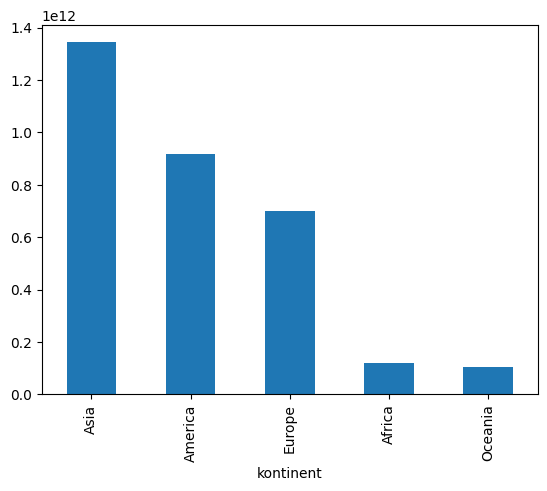

In [179]:
filter_gdp = (drzave['gdp (USD per capita)'] != 0)
podtabela1 = drzave[filter_gdp].copy()
podtabela1['total gdp'] = podtabela1['gdp (USD per capita)'] * podtabela1['populacija']
total_gdp_na_kontinentu = podtabela1.groupby(by="kontinent")["total gdp"].mean()
total_gdp_na_kontinentu.sort_values(inplace = True, ascending = False)
total_gdp_na_kontinentu.plot.bar()

Kako pa stopnja GDP - ja v vpliva na življenjsko dobo ljudi v državi?<br>Opazimo lahko, da graf postopoma narašča, kar nam pove da  bodo prebivalci držav z višjim GDP - jem, imeli v povprečju daljšo življensko dobo, kot pa prebivalci držav z nižjim GDP.

<Axes: xlabel='življenska doba (leta)'>

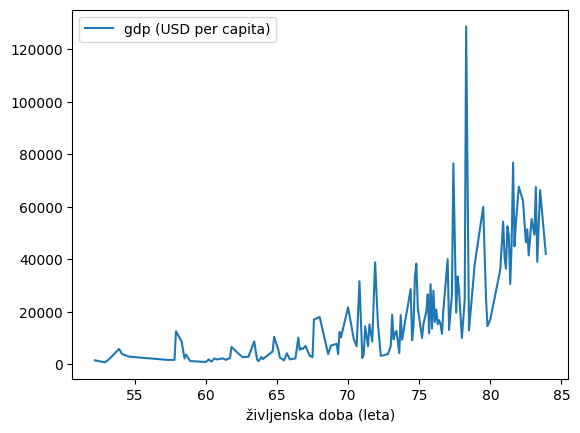

In [180]:
filter_doba = (drzave['življenska doba (leta)'] != 0)
podtabela2 = drzave[filter_doba & filter_gdp].copy()
podtabela2.groupby(by='življenska doba (leta)').agg({'gdp (USD per capita)':"mean"}).plot()

Kako pa območje, ki ga obsega država vpliva na njeno povprečno življensko dobo?<br>Veliko držav je zelo majhnih, vendar lahko opazimo iz grafa, da območje države ne vpliva bistveno na povprečno življensko dobo njenih prebivalcev.

<Axes: xlabel='življenska doba (leta)', ylabel='območje (km2)'>

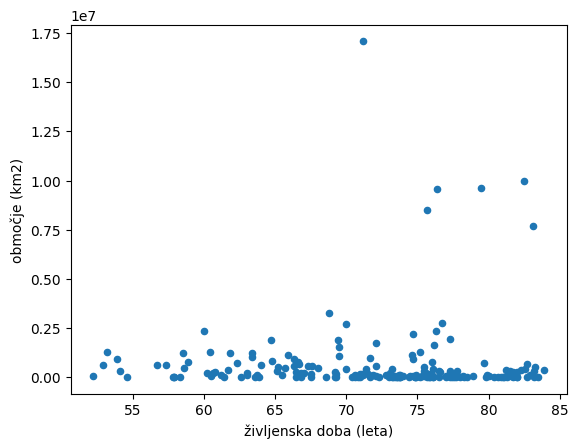

In [181]:
podtabela3 = drzave[filter_doba].copy()
podtabela3.plot.scatter(x='življenska doba (leta)', y='območje (km2)')

Sedaj pa se bomo osredotočili le na države znotraj Evrope.<br>Najprej nas zanima katere vere so najbolj popularne v Evropskih državah.

<Axes: xlabel='vera'>

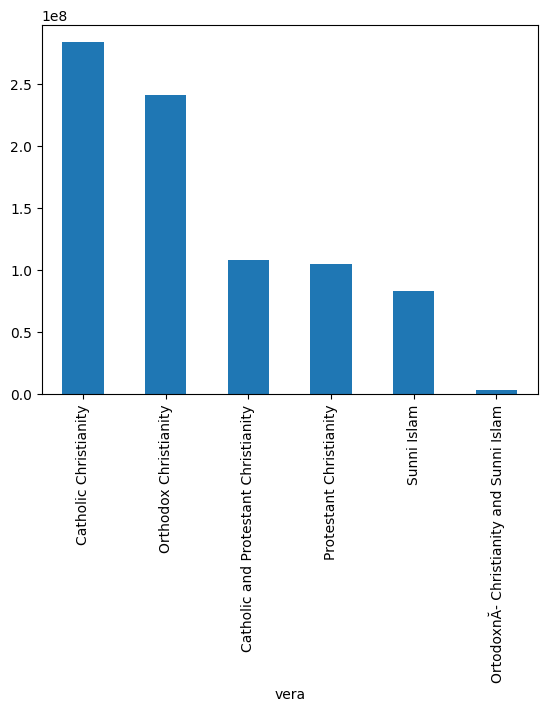

In [182]:
filter_evropa = (drzave['kontinent'] == 'Europe')
podtabela4 = drzave[filter_evropa].copy()
vere_evropa = podtabela4.groupby('vera')['populacija'].sum()
vere_evropa.sort_values(inplace= True,ascending=False)
vere_evropa.plot.bar()

Kot opazimo iz grafa ena vera izstopa, zato nas zanima katera država jo ima in ta država je Bosna in Hercegovina.

In [183]:
fileter_izstopa = podtabela4['vera'] == 'OrtodoxnĂ­ Christianity and Sunni Islam'
podtabela4[fileter_izstopa][['vera']]

,vera
ime,
Bosnia and Herzegovina,OrtodoxnĂ­ Christianity and Sunni Islam


Spodnaj tabele prikazuje katere so največje države, ki imajo paralamentarno monarhijo kot njihovo politično ureditev.<br>Kot vidimo je Kanada največja država s parlamentarno monarhijo.

In [184]:
filter_monarhija = drzave['vlada'] == 'constitutional monarchy based on parlamentarism' 
podtabela5 = drzave[filter_monarhija].copy()
podtabela5[['območje (km2)', 'vlada']].sort_values('območje (km2)',ascending=False).head(10)

,območje (km2),vlada
ime,,
Canada,9976140,constitutional monarchy based on parlamentarism
Australia,7686850,constitutional monarchy based on parlamentarism
Thailand,514000,constitutional monarchy based on parlamentarism
Spain,504782,constitutional monarchy based on parlamentarism
Papua New Guinea,462840,constitutional monarchy based on parlamentarism
Sweden,449964,constitutional monarchy based on parlamentarism
Norway,386700,constitutional monarchy based on parlamentarism
Japan,377835,constitutional monarchy based on parlamentarism
Malaysia,329750,constitutional monarchy based on parlamentarism


Poglejmo še na katerem kontinentu se nahja največ držav s parlamentarno monarhijo.<br>Evropa in Amerika sta izenačeni, zato nas zanima katere države v Ameriki imajo to politično ureditev.

<Axes: xlabel='kontinent'>

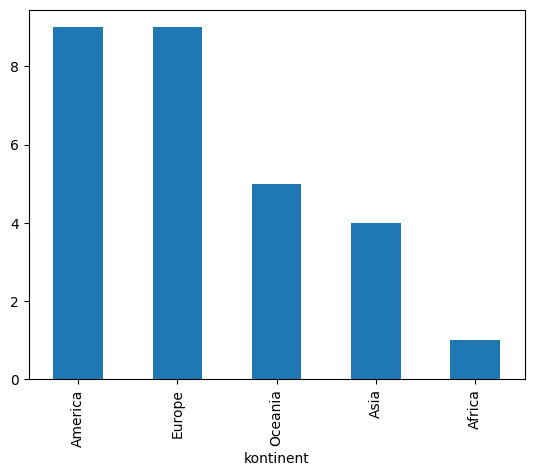

In [185]:
monarhije = podtabela5.groupby(by=['kontinent']).size()
monarhije.sort_values(inplace= True,ascending=False)
monarhije.plot.bar()

Kot lahko iz tabele opazimo so večina držav na njej bivše kolonije različnih evropskih držav, kar je tudi razlog za tako veliko število parlamentarnih monarhij v Ameriki.

In [186]:
filter_amerika = drzave['kontinent'] == "America"
podtabela6 = drzave[filter_amerika & filter_monarhija].copy()
podtabela6[['kontinent', 'območje (km2)', 'vlada']].sort_values('območje (km2)',ascending=False).head(10)

,kontinent,območje (km2),vlada
ime,,,
Canada,America,9976140,constitutional monarchy based on parlamentarism
Belize,America,22966,constitutional monarchy based on parlamentarism
The Bahamas,America,13940,constitutional monarchy based on parlamentarism
Jamaica,America,10990,constitutional monarchy based on parlamentarism
Saint Lucia,America,620,constitutional monarchy based on parlamentarism
Antigua and Barbuda,America,442,constitutional monarchy based on parlamentarism
Barbados,America,431,constitutional monarchy based on parlamentarism
Grenada,America,344,constitutional monarchy based on parlamentarism
Saint Kitts and Nevis,America,261,constitutional monarchy based on parlamentarism


## Zaključek
Pri analizi teh podatkov, sem pridobila celosten vpogled v demografske, geografske in kulturne razlike med državami. Ugotovitve kažejo, da so gostota prebivalstva in povprečna življenjska doba tesno povezani z gospodarskim razvojem in kakovostjo življenja.